In [1]:
#!pip install -r ../requirements.txt

In [2]:
import pandas as pd
import geopandas as gpd
from pysal.lib import weights
from pysal.explore import esda
import matplotlib.pyplot as plt

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\spaghetti\network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


In [3]:
df = pd.read_csv('../data/star_classification_10_full_p.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,class,redshift,a,b,c
0,1.237663e+18,15.342907,0.794882,18.74547,17.49025,16.89122,16.57350,16.29910,GALAXY,0.042002,-0.654218,0.250033,0.713781
1,1.237664e+18,120.365538,55.660432,19.99985,19.68133,19.50156,19.17364,19.16122,QSO,1.633797,0.348727,0.525619,-0.775960
2,1.237655e+18,245.610038,42.974786,23.11792,20.81292,18.88351,18.12335,17.68182,GALAXY,0.454852,0.450750,0.286260,-0.845505
3,1.237660e+18,127.957356,6.647703,21.94454,21.01012,20.93496,20.93184,20.56855,QSO,2.608515,-0.618062,0.700648,0.356499
4,1.237665e+18,159.174526,35.881846,18.89945,17.68422,17.02925,16.60000,16.36798,GALAXY,0.083804,0.122096,-0.211234,-0.969780


In [4]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['alpha'], df['delta']))

In [5]:
def spacial_cluster_correlation(gdf: gpd.GeoDataFrame, var: str, k: int = 5):
    W = weights.KNN.from_dataframe(gdf, k=k)
    y = gdf[var]  # Variável de interesse
    moran = esda.Moran(y, W)

    # Visualizar o resultado
    print("Índice de Moran Global:", moran.I)
    plt.scatter(y, moran.z, alpha=0.5)
    plt.axhline(0, color='k', linestyle='--')
    plt.xlabel('Espectro Luminoso')
    plt.ylabel('Valores Padronizados de Moran')
    plt.title(f'Gráfico de Dispersão para Índice de Moran da Variavel \'{var}\'')
    plt.show()

c:\Users\Felipe Castro\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 12 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Índice de Moran Global: 0.12073104425868188


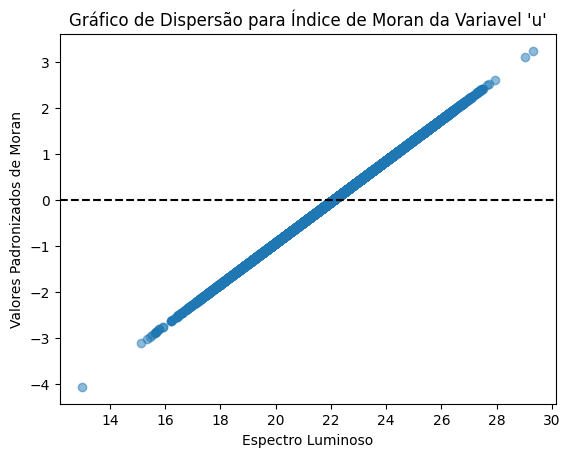

Índice de Moran Global: 0.16399503961963297


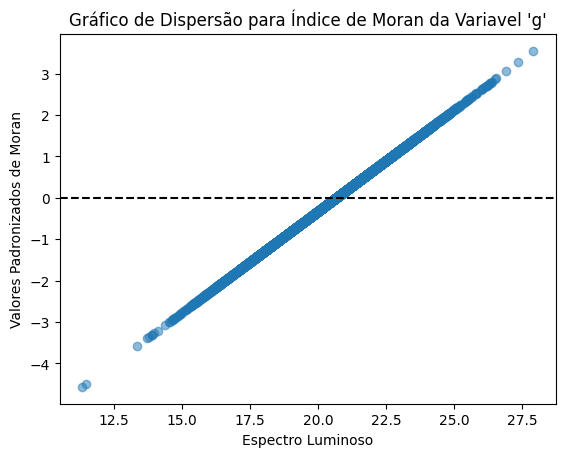

Índice de Moran Global: 0.17722529080932453


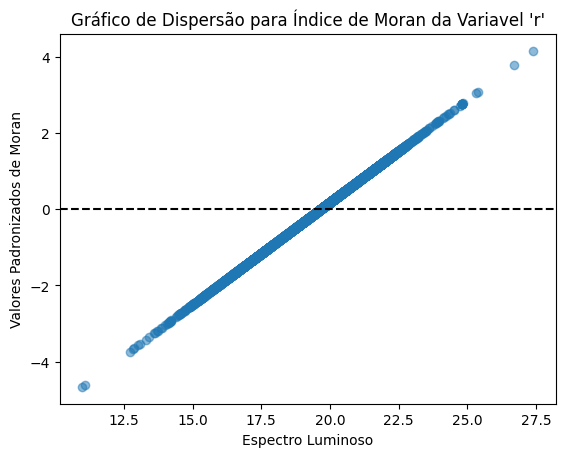

Índice de Moran Global: 0.17823226839064804


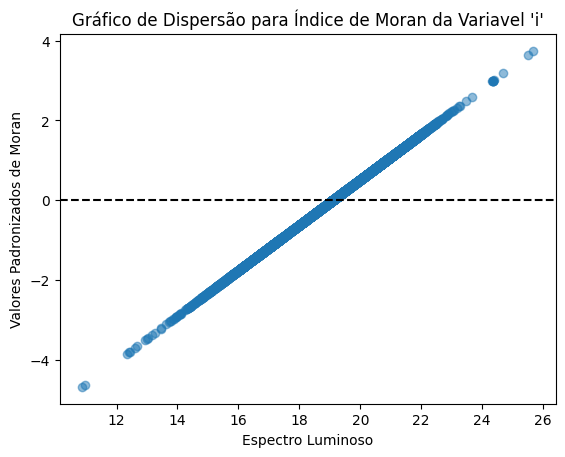

Índice de Moran Global: 0.1752488235603769


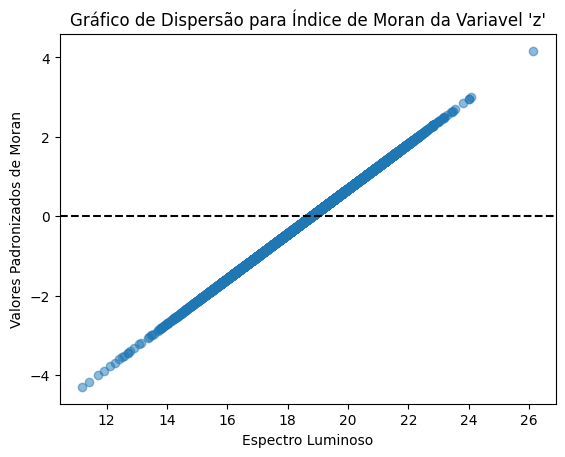

Índice de Moran Global: 0.08757855800394995


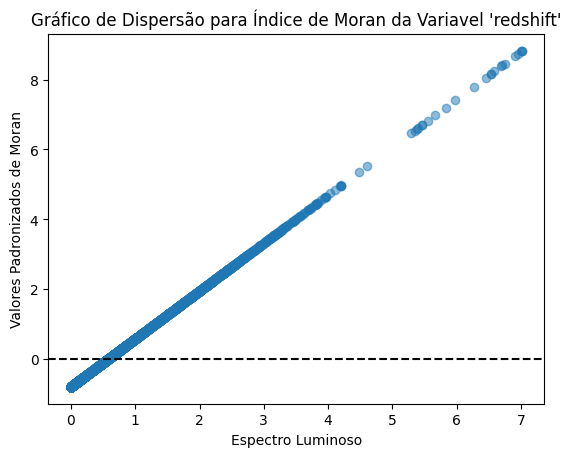

In [6]:
colors = ['u', 'g', 'r', 'i', 'z', 'redshift']

for c in colors:
    spacial_cluster_correlation(gdf, c)